# Введение

## Что такое индекс промышленного производства?
Индекс промышленного производства (IPI) является ежемесячным экономическим показателем, измеряющим реальный объем производства в обрабатывающей, горнодобывающей, электрической и газовой промышленности относительно базового года. Об этом сообщает Совет конференции.

## Как работает индекс промышленного производства (IPI)?
Совет Федеральной резервной системы (FRB) публикует индекс промышленного производства (IPI) в середине каждого месяца, а пересмотр предыдущих оценок публикуется в конце каждого марта. IPI измеряет уровни производства в производственном секторе, горнодобывающей промышленности, включая услуги по бурению нефтяных и газовых месторождений – а также в электроэнергетике и газоснабжении. Он также измеряет мощность, оценку уровней производства, которые могут быть устойчиво поддержаны; и использование мощностей, отношение фактического объема производства к мощности.

## Расчет IPI
Уровни промышленного производства и производственных мощностей выражаются в виде индексного уровня по отношению к базовому году (в настоящее время 2012 год). Другими словами, они выражают не абсолютные объемы производства или значения, а процентное изменение объема производства по отношению к 2012 году. Исходные данные разнообразны, включая физические затраты и объемы производства, такие как тонны стали; скорректированные на инфляцию показатели продаж; и, когда другие эти другие источники данных недоступны, часы, регистрируемые производственными работниками. ФРБ получает эти данные от отраслевых ассоциаций и государственных учреждений и агрегирует их в индекс, используя формулу Фишера-идеала.

В рамках общего ИПИ существует ряд субиндексов, дающих детальный взгляд на выпуск продукции узкоспециализированных отраслей: продажа бытового газа, мороженого и замороженных десертов, ковровые и ковровые мельницы, пружинные и проволочные изделия, чугун, аудио-и видеотехника, бумага-это лишь некоторые из десятков отраслей, по которым имеются ежемесячные данные о производстве.

# Актуальность
Отраслевые данные полезны для менеджеров и инвесторов в рамках конкретных направлений бизнеса, в то время как сводный индекс является важным макроэкономическим показателем для экономистов и инвесторов. Колебания в промышленном секторе составляют большую часть колебаний общего экономического роста, поэтому ежемесячная метрика помогает держать инвесторов в курсе изменений в объеме производства. В то же время ИПИ отличается от самого популярного показателя экономического производства-валового внутреннего продукта (ВВП): ВВП измеряет цену, уплачиваемую конечным потребителем, поэтому он включает добавленную стоимость в розничном секторе, которую IPI игнорирует. Важно также отметить, что промышленный сектор составляет низкую и падающую долю экономики США: менее 20% ВВП по состоянию на 2016 год.

Использование производственных мощностей является полезным показателем силы спроса. Низкая загрузка производственных мощностей-переизбыток мощностей, другими словами – сигнализирует о слабом спросе. Политики могли бы воспринять это как сигнал о необходимости фискального или монетарного стимулирования. Инвесторы могли бы воспринять это как признак надвигающегося спада или – в зависимости от сигналов из Вашингтона-как признак грядущего стимулирования. Высокая загрузка производственных мощностей, с другой стороны, может служить предупреждением о перегреве экономики, предполагая риск роста цен и пузырей активов. Политики могут отреагировать на эти угрозы повышением процентных ставок или жесткой бюджетной экономией, или же они могут позволить бизнес-циклу идти своим чередом, что в конечном итоге может привести к рецессии.

Отметим, что в ходе этой работы рассматривается только индекс электрической и газовой промышленности взятый с данного сайта: https://fred.stlouisfed.org/series/IPG2211A2N#0.

# Ход работы

Импортируем необходимые библиотеки:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import xlrd
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

from pandas.plotting import autocorrelation_plot

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Импортируем данные:

In [0]:
df = pd.read_excel('https://github.com/anastasiarazb/skillbox-data-analyst-intensive/raw/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls', skiprows=10)

Сделаем столбец observation_date столбцом индексов:

In [0]:
df.index = pd.to_datetime(df['observation_date'], format='%d.%m.%Y %H:%M')
del df['observation_date']

Построим график изменения индекса промышленного производства, а также усредненный по году график и наложим их друг на друга:

findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


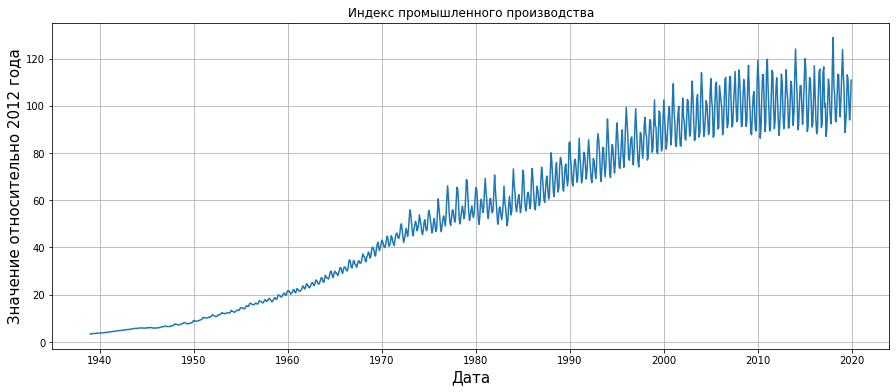

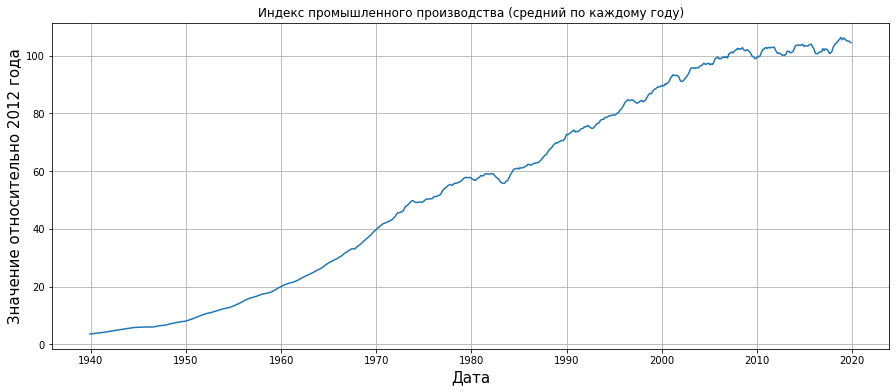

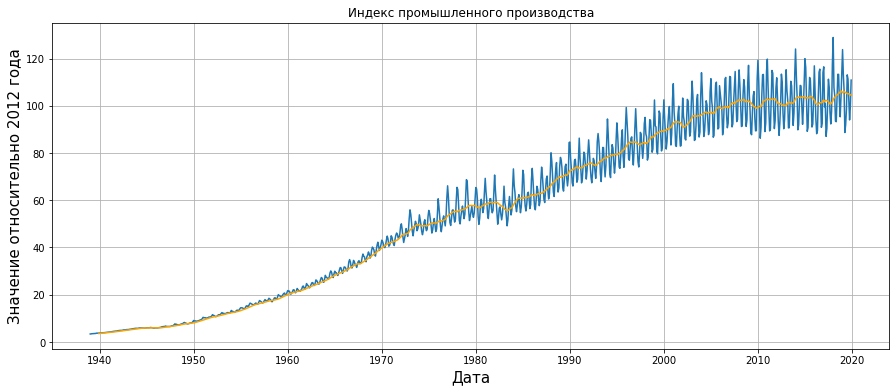

In [4]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства')
plt.plot(df.index, df['IPG2211A2N'])
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.show()
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства (средний по каждому году)')
plt.plot(df.index, df['IPG2211A2N'].rolling(12).mean())
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.show()
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства')
plt.plot(df.index, df['IPG2211A2N'])
plt.plot(df.index, df['IPG2211A2N'].rolling(12).mean(), color='orange')
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.show()

Из усредненных данных можно сделать вывод, что в целом индекс только растет. Однако, начиная с 2009 года, этот рост почти незаметен.

Посмотрим на выборку данных, начиная с 2009 года:

In [0]:
date_from = pd.Timestamp(day=1, month=1, year=2009) # Назначаем штамп времени на дату, с которой хотим посмотреть данные
cutted_df = df[date_from <= df.index]  # Обрезаем датафрейм

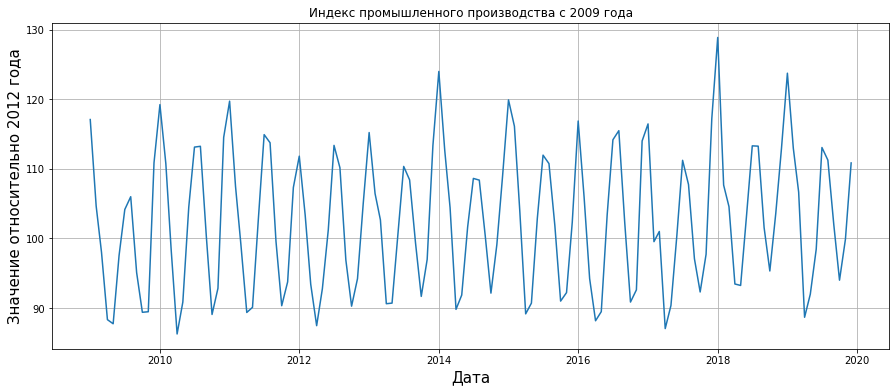

In [6]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства с 2009 года')
plt.plot(cutted_df.index, cutted_df['IPG2211A2N'])
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.show()

Чтобы убедиться в росте функции на данном промежутке, построим линейный регрессор:

In [0]:
regressor = LinearRegression() # Задаем в качестве регрессора линейный
N = len(cutted_df)
x_range1 = list(range(N)) 
X1 = pd.DataFrame(x_range1)
regressor.fit(X1, cutted_df['IPG2211A2N'])
result1 = regressor.predict(X1)

Модель обучилась. Посмотрим, действительно ли возрастает зависимость на данном промежутке, а также сравним с средней прямой:

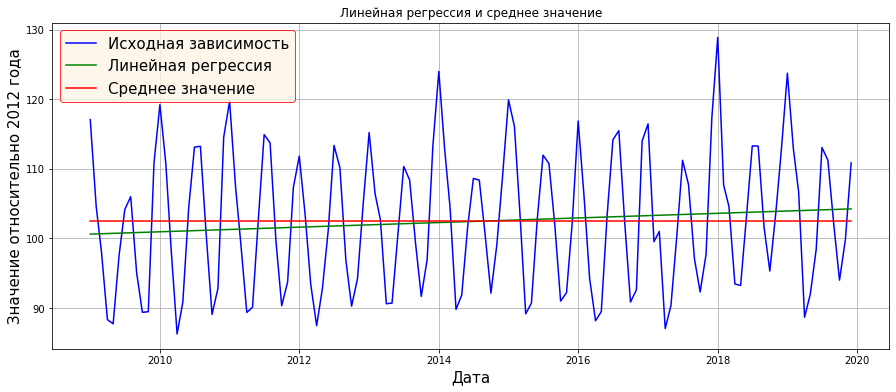

In [8]:
fig, ax = plt.subplots()

plt.grid()
plt.title('Линейная регрессия и среднее значение')
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)

ax.plot(cutted_df.index, cutted_df['IPG2211A2N'], label = 'Исходная зависимость', color = 'b')
ax.plot(cutted_df.index, result1, label = 'Линейная регрессия', color = 'g')
ax.plot(cutted_df.index, [cutted_df['IPG2211A2N'].mean()]*N, label = 'Среднее значение', color = 'r')

ax.legend(fontsize = 15,
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r',
         )

fig.set_figwidth(15)
fig.set_figheight(6)
plt.show()

Исходя из графика видим, что в среднем индекс действительно возрастает на этом промежутке.

Рассмотрим автокорреляцию временного ряда на этом промежутке:

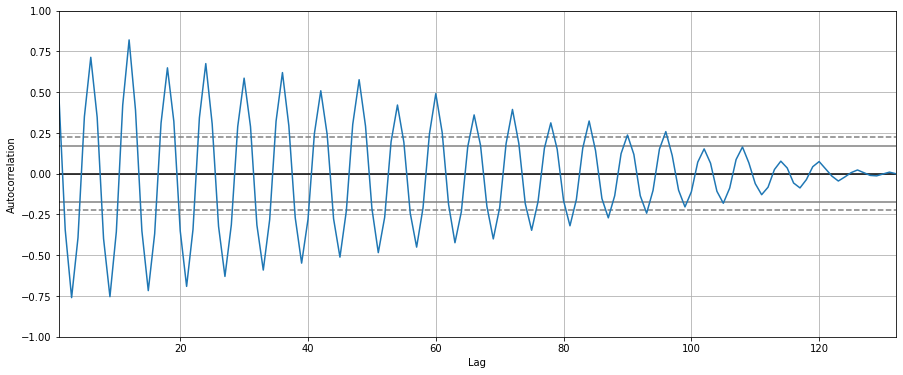

In [9]:
plt.figure(figsize=(15, 6))
pd.plotting.autocorrelation_plot(cutted_df['IPG2211A2N'])
plt.show()

Исходя из полученных значений, мы можем говорить о сезонности данных.

Посмотрим на квантили:

In [0]:
q1 = [cutted_df['IPG2211A2N'].quantile(0.95)]*len(cutted_df)
q2 = [cutted_df['IPG2211A2N'].quantile(0.05)]*len(cutted_df)

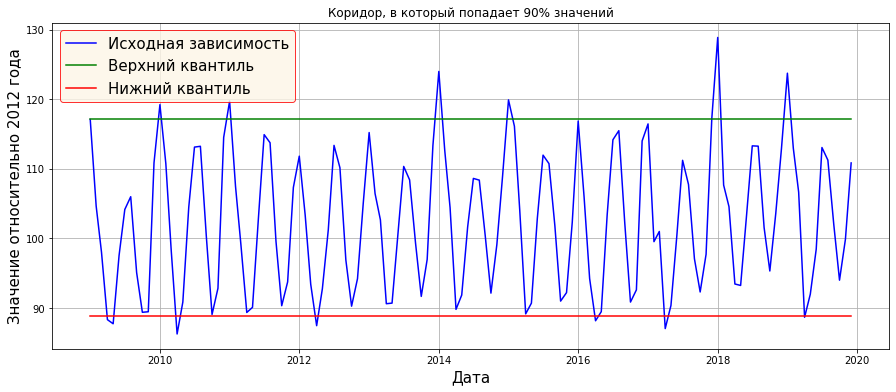

In [11]:
fig, ax = plt.subplots()

plt.grid()
plt.title('Коридор, в который попадает 90% значений')
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)

ax.plot(cutted_df.index, cutted_df['IPG2211A2N'], label = 'Исходная зависимость', color = 'b')
ax.plot(cutted_df.index, q1, label = 'Верхний квантиль', color = 'g')
ax.plot(cutted_df.index, q2, label = 'Нижний квантиль', color = 'r')

ax.legend(fontsize = 15,
          ncol = 1,
          facecolor = 'oldlace',
          edgecolor = 'r',
         )

fig.set_figwidth(15)
fig.set_figheight(6)
plt.show()

Для наглядности изменения скорости роста проведем еще прямую для участка с 1985 по 2009 годы и отобразим обе прямые на общем графике:

Сделаем еще один обрезанный, но в этот раз с двух сторон, датафрейм:

In [12]:
date_from2 = pd.Timestamp(day=1, month=1, year=1985)
date_to2 = pd.Timestamp(day=1, month=1, year=2009)
cutted_df2 = df[date_from2 <= df.index]
cutted_df2 = cutted_df2[cutted_df2.index <= date_to2]
df2 = pd.concat([cutted_df2, cutted_df]) # Объединим оба обрезанных массива данных
df2.reset_index() # Сбросим для него индекс

,observation_date,IPG2211A2N
0,1985-01-01,72.6803
1,1985-02-01,70.8479
2,1985-03-01,62.6166
3,1985-04-01,57.6106
4,1985-05-01,55.4467
...,...,...
416,2019-08-01,111.2697
417,2019-09-01,102.0033
418,2019-10-01,93.9993
419,2019-11-01,99.8843


Обучим линейную модель:

In [0]:
N2 = len(cutted_df2)
x_range2 = list(range(N2)) 
X2 = pd.DataFrame(x_range2)
regressor.fit(X2, cutted_df2['IPG2211A2N'])
result2 = regressor.predict(X2)

Построим график, который демонстрирует спад роста:

Для этого напишем функцию, продлевающую прямые на графике:

In [0]:
def drawLine2P(x,y,xlims):
    xrange = np.arange(xlims[0],xlims[1],1)
    A = np.vstack([x, np.ones(len(x))]).T
    k, b = np.linalg.lstsq(A, y)[0]
    plt.plot(xrange, k*xrange + b, 'k')

Собственно строим график:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


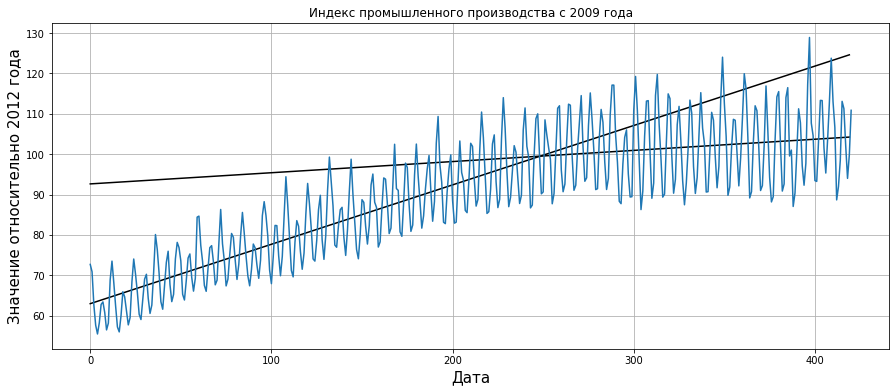

In [15]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства с 2009 года')
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
drawLine2P(range(len(result2)), result2, [range(len(df2.index))[0], range(len(df2.index))[-1]])
drawLine2P(np.array(range(len(result1))) + len(result2), result1, [range(len(df2.index))[0], range(len(df2.index))[-1]])
plt.plot(range(len(df2.index)), df2['IPG2211A2N'])

plt.show()

Также можно обратить внимание, что максимумы находятся зимой и летом, а минимумы - весной и осенью.
Поэтому посмотрим на зависимость отдельно взятых индексов в январе, июле, марте и октябре:

Создадим датафрейм с интересующими нас данными:

In [0]:
january = df[df.index.month == 1]['IPG2211A2N'].tolist()
april = df[df.index.month == 4]['IPG2211A2N'].tolist()
july = df[df.index.month == 7]['IPG2211A2N'].tolist()
october = df[df.index.month == 10]['IPG2211A2N'].tolist()
month_df = pd.DataFrame(index=df[df.index.month == 10].index.year, data = {'january': january, 
                                                                           'april': april, 
                                                                           'july': july, 
                                                                           'october':october})

Построим график:

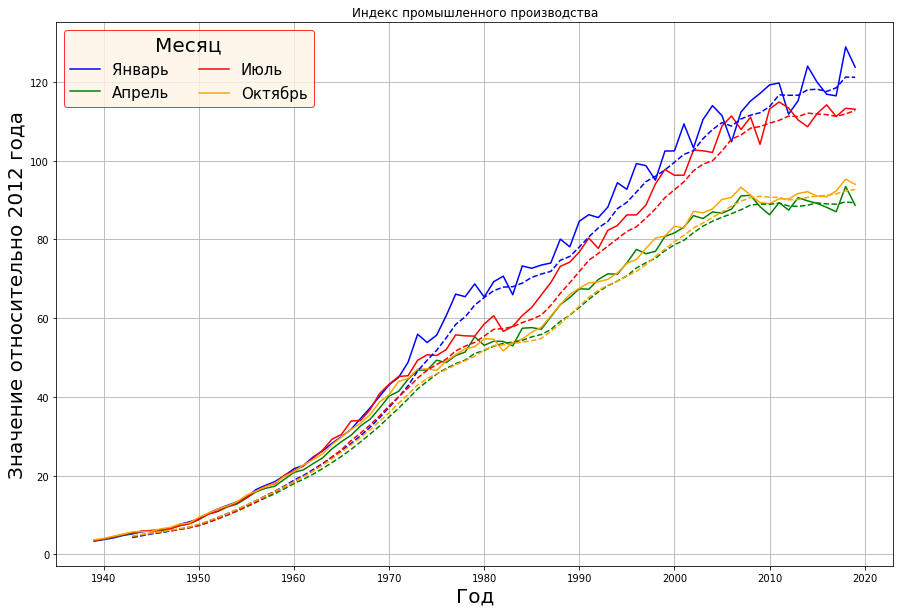

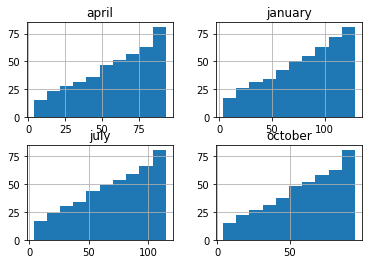

In [17]:
fig, ax = plt.subplots()

plt.grid()
plt.title('Индекс промышленного производства')
plt.xlabel(u'Год', fontsize = 20)
plt.ylabel(u'Значение относительно 2012 года', fontsize = 20)

ax.plot(month_df.index, month_df['january'], label = 'Январь', color = 'b')
ax.plot(month_df.index, month_df['april'], label = 'Апрель', color = 'g')
ax.plot(month_df.index, month_df['july'], label = 'Июль', color = 'r')
ax.plot(month_df.index, month_df['october'], label = 'Октябрь', color = 'orange')
plt.plot(month_df.index, month_df['january'].rolling(5).mean(), '--', color = 'b')
plt.plot(month_df.index, month_df['april'].rolling(5).mean(), '--', color = 'g')
plt.plot(month_df.index, month_df['july'].rolling(5).mean(), '--', color = 'r')
plt.plot(month_df.index, month_df['october'].rolling(5).mean(), '--', color = 'orange')


ax.legend(fontsize = 15,
          ncol = 2,
          facecolor = 'oldlace',
          edgecolor = 'r',
          title = 'Месяц',
          title_fontsize = '20'
         )

fig.set_figwidth(15)
fig.set_figheight(10)
plt.show()
month_df.hist(cumulative = 1)
plt.show()

Таким образом, мы убедились, что индекс зимой имеет наибольшее значение, летом чуть ниже, а осенью и весной значительно ниже.

Индекс промышленного производства (IPI) является ежемесячным экономическим показателем, измеряющим реальный объем производства в обрабатывающей, горнодобывающей, электрической и газовой промышленности относительно базового года. 
В нашем случае рассматривается индекс только электрической и газовой промышленности.

Исходя из этого можно понять, что такая разница между временами года объясняется климатом США. Например, зимой логично использование нагревателей, а летом - кондиционеров и вентиляторов.

Посмотрим на попарную корреляцию данных:

In [18]:
month_df.corr()

,january,april,july,october
january,1.000000,0.996209,0.995044,0.995846
april,0.996209,1.000000,0.995111,0.999048
july,0.995044,0.995111,1.000000,0.997123
october,0.995846,0.999048,0.997123,1.000000


Видим, что данные отлично коррелируют попарно друг с другом. Это вполне логично, т.к. в среднем индекс растет.

# Выводы

    - Индекс промышленного производства электроэнергии и газовой промышленности монотонно растет. Следовательно спрос на услуги этих видов промышленности не спадает.
    - С 2009 года скорость роста значительно упала. Следовательно рост промышленности данного вида с 2009 года практически остановился.
    - Зимой индекс промышленного производства максимален для каждого года, летом принимает значение незначительно ниже, весной и осенью - минимальное значение.
    - С течением времени данные сезонов все больше отличаются друг от друга.
    - Данные за каждый сезон отлично попарно друг с другом коррелируют.
    - На основе автокорреляции, можно говорить о сезонности временного ряда с 2010 года
    - Рассматривать полный датасет не имеет смысла, т.к. ближе к настоящему времени тенденция сильно изменилась.
    - Лучше всего исследовать данные после 2009 года.

# Неприменимые методы

Начнем с автокорреляции за весь период.

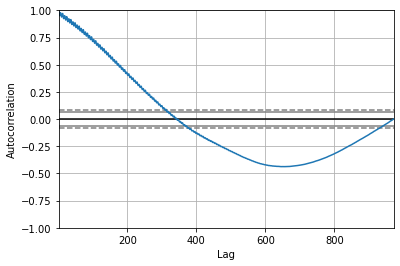

In [19]:
pd.plotting.autocorrelation_plot(df['IPG2211A2N'])

Видно, что чем ниже сдвиг, тем лучше данные автокоррелируют. Так как по коэффициенту автокорреляции судят о наличии линейной тенденции, можно сделать вывод, что наши данные не имеют такой тенденции. Отметим, что там нет даже экспоненциальной или квадратичной зависимости, при которых этот коэффициент стремится к 0.7. Так что рассматривать ее не стоит.

Также нет смысла рассматривать среднее значение данных за весь период.

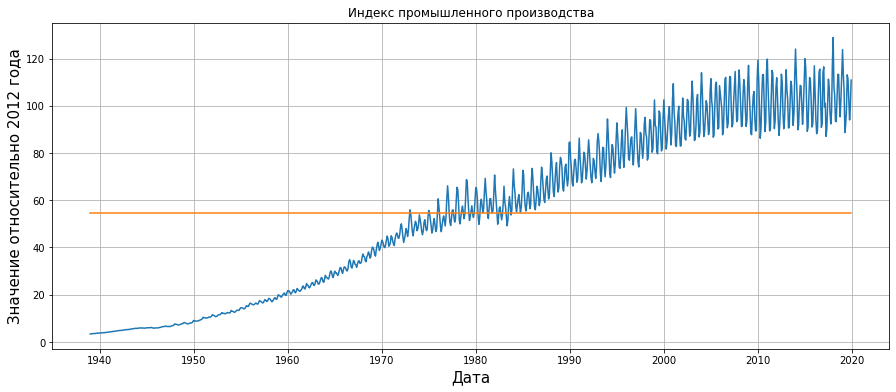

In [20]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства')
plt.plot(df.index, df['IPG2211A2N'])
plt.plot(df.index, [df['IPG2211A2N'].mean()]*len(df.index))
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)

plt.show()

Квантили не имеет смысл рассматривать за весь период, т.к. наблюдается монотонный рост зависимости. Таким образом они не несут информации.

In [0]:
q1none=[df['IPG2211A2N'].quantile(0.95)]*len(df)
q2none=[df['IPG2211A2N'].quantile(0.05)]*len(df)

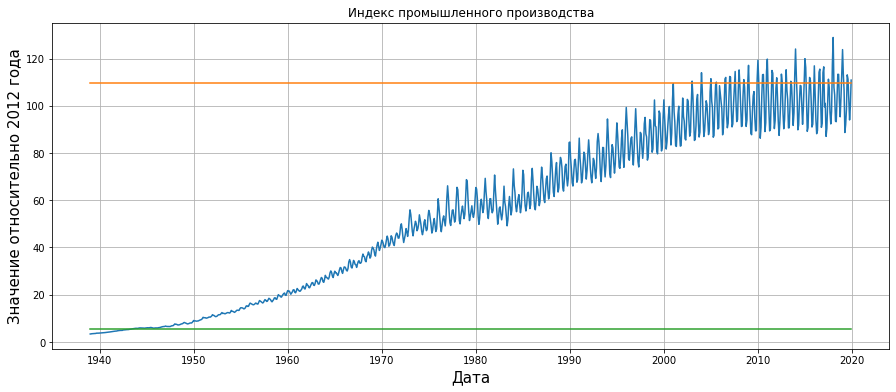

In [22]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Индекс промышленного производства')
plt.plot(df.index, df['IPG2211A2N'])
plt.plot(df.index, q1none)
plt.plot(df.index, q2none)
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)

plt.show()

Также нет смысла строить линейную регрессию на всем промежутке, т.к. нет линейной тенденции:

In [0]:
regressor = LinearRegression() # Задаем в качестве регрессора линейный
N = len(df)
x_range = list(range(N)) 
X = pd.DataFrame(x_range)
regressor.fit(X, df['IPG2211A2N'])
result = regressor.predict(X)

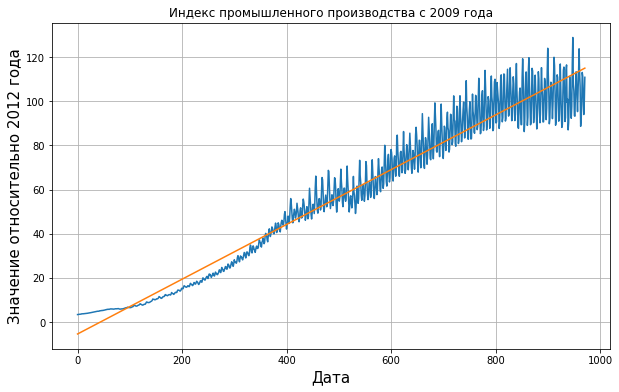

In [24]:
plt.figure(figsize=(10, 6))
plt.grid()
plt.title('Индекс промышленного производства с 2009 года')
plt.xlabel(u'Дата', family='verdana', fontsize = 15)
plt.ylabel(u'Значение относительно 2012 года', family='verdana', fontsize = 15)
plt.plot(X.index, df['IPG2211A2N'])
plt.plot(X.index, result)
plt.show()

Добавим также, что в данном случае строить не куммулятивную гистограмму также не имеет особого смысла. Как минимум это не наглядно, а также не дает никакой применимой информации:

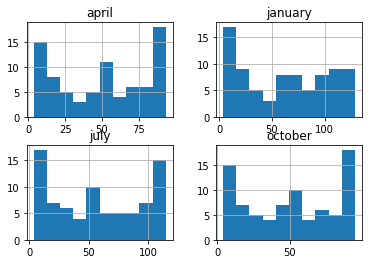

In [25]:
month_df.hist()
plt.show()

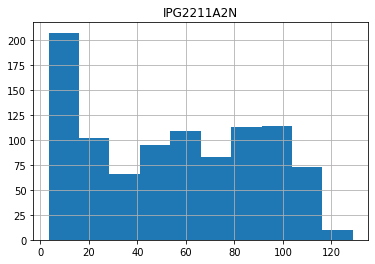

In [26]:
df.hist()
plt.show()

# Подведем итоги:
В ходе работы были исследованы данные IPG2211A2N за период 1939-2019 гг. Были построены и изучены различные зависимости изменения этого индекса. Построен линейный регрессор для исследования зависимости в период 2009-2019 гг. На основе полученного сделаны выводы. Также выяснены методы исследования, которые не имеет смысла применять для изучаемых данных.